# Does Passenger class affects possibility of survival?

 [Titanic dataset](https://www.kaggle.com/c/titanic/data) is a dataset containing details of passengers on board Titanic when it met with its fate in 1912. In this notebook we will compare how Passenger class affects the probability (both are categorical) with chi square test. 
 For Introduction to chi-square test please refer [my previous notebook](https://github.com/viswanathanc/statistics/blob/master/Chi%20-%20Square%20test.ipynb) and [this video](https://www.youtube.com/watch?v=qYOMO83Z1WU).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("train.csv", index_col='PassengerId', usecols=['PassengerId','Pclass','Survived'])
data.head()

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 2 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
dtypes: int64(2)
memory usage: 20.9 KB


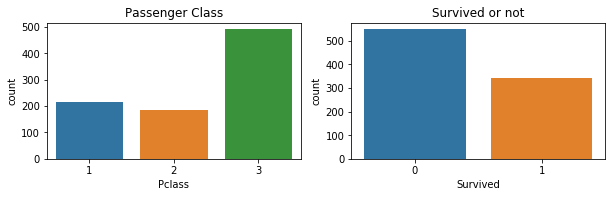

In [21]:
plt.figure(figsize=(10,2.5))

plt.subplot(121)
sns.countplot(data.Pclass)
plt.title("Passenger Class")

plt.subplot(122)
sns.countplot(data.Survived)
plt.title("Survived or not")

plt.show()

In [73]:
PClass_survd = pd.pivot_table(data,index=['Pclass'],columns=['Survived'],aggfunc='size')
PClass_survd

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


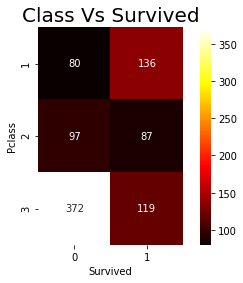

In [59]:
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Class Vs Survived',fontsize=20)
plt.show()

891 data are present in the data. Most of the people in 3rd class died while most of the people in 1st class survived. In order to see whether there is a bias in the data, we can do chi square test with an assumption that there is no biase between the columns. We can also do Chi_square test directly from the contigency table (You can find it in next session).

In [83]:
pct_class = PClass_survd.sum(axis=1)/891
pct_class

Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

In [82]:
pct_survived = PClass_survd.sum(axis=0)/891
pct_survived

Survived
0    0.616162
1    0.383838
dtype: float64

we see that there is 24% of total passengers in Class 1, 20.65% of total passengers in Class 2 and remaining 55.11% in Class 3.

Also 61.62% of total passeneger survived.

If we have null hypothesis as 'The Survival does not depend on the Class the passengers were travelling', then we expect the distribution to be have similar proportions in all columns. Thats same proportion of people in all classes survived.

So the expected will be a product of pct_class, pct_survived and total_passengers.

In [94]:
pct_class.to_frame()@(pct_survived.to_frame().T) 
# These are the proportion of people expected with null hypothesis

Survived,0,1
Pclass,,
1,0.149373,0.093052
2,0.127243,0.079266
3,0.339546,0.211520


In [97]:
exp = round(pct_class.to_frame()@(pct_survived.to_frame().T)*891)
exp
# This is the number of people in all classes and survival history expected.

Survived,0,1
Pclass,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


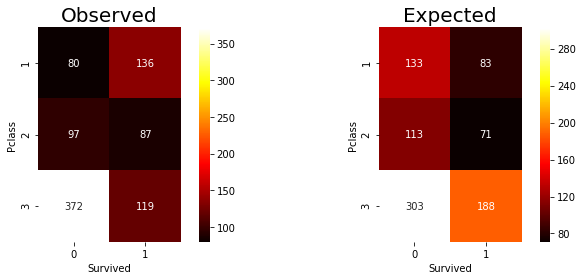

In [109]:
plt.figure(figsize=(10,4))

plt.subplot('121')
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot('122')
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()


There is a visible difference between the expected and the observed distributions. So are they by chance or not? Lets now find the Chi value and P value.

In [112]:
Chi_table = ((PClass_survd - exp)**2)/exp
Chi_table

Survived,0,1
Pclass,,
1,21.120301,33.843373
2,2.265487,3.605634
3,15.712871,25.324468


This table has the value of Chi square for each class and the survival rate. Here we note that the degrees of freedom is 2x1.

In [120]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  101.87213414657131
P value is 5.9223796800860216e-24


Chi value is 101.8721 and p value is 0. 

# Chi square test from contigency table

In [119]:
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(PClass_survd)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  102.88898875696056
P value is 4.549251711298793e-23
Degrees of Freedom: 2


  Here we see that the P value is much less than zero and we can reject the null hypothesis with confidence! 
  
  
  **So Survival of a passenger is not independent of their class...**
  
  There is a great dependence. 
  
  Having made comparisons between two categorical columns. We can use this methodology for feature selection as well. 
  
  "If null hypothesis cannot be rejected for a categorical column on chi square test with target, then target is independent of the paticular column and can be rejected!"